In [1]:
import torchvision
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Downloading the dataset
train_set = torchvision.datasets.FashionMNIST(root = ".", train= True ,download = True , transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train= False ,download = True , transform = transforms.ToTensor())

In [3]:
training_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_set , batch_size = 32, shuffle = False)

In [4]:
torch.manual_seed(0)

# B Question

In [5]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with ReLU activation function
class Network_relu(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight) #Initializing the weights to the 1st convolutional layer
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight) #Initializing the weights to the 2nd convolutional layer

        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight) #Initializing the weights to the 1st linear layer
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight) #Initializing the weights to the 2nd linear layer
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight) #Initializing the weights to the output layer

    
    #Mapping input tensor to the outpur tensor
    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = F.relu(t) #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2) #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = F.relu(t) #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2) #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = F.relu(t)  #relu activation

        # 2nd Linear Layer
        t = self.fc2(t)
        t = F.relu(t)  #relu activation

        # Output Layer
        t = self.out(t)

        return t

In [6]:
#Function calculating the accuacy and the loss of the network on the training loader dataset

def train_set_accuracy(training_loader, network, learning_rate):
    
    #optimizer object of stochastic gradient descent type having particular learning rate
    optimizer = optim.SGD(network.parameters(), lr = learning_rate)
    

    total_loss = 0  #Variable to calculate the total loss of the dataset
    total_correct = 0  #Variable that calculates the total correct predictions done by the network

    for batch in training_loader: # Get Batch
        training_images, training_labels = batch  #Getting tensor of images and tensor of corresponding labels
        training_images, training_labels = training_images.cuda(), training_labels.cuda() #Passing the tensor to the GPU

        predictions = network(training_images) # Pass the batch to the network
        training_loss = F.cross_entropy(predictions, training_labels) # Calculating the cross entropy loss

        optimizer.zero_grad()#Set the gradient values to zero so that already present values are not added to the new batch
        training_loss.backward() # Calculate the gradients
        optimizer.step() # Update the weights

        total_loss += training_loss.item() #Add the loss caclulated per batch
        
        #Caculate the element wise equality to measure the accuracy between the predictions and the labels
        total_correct += predictions.argmax(dim=1).eq(training_labels).sum().item()  
  
    return total_correct*100/len(train_set), total_loss*100/len(train_set)

In [7]:
#Function calculating the accuacy and the loss of the network on the test loader dataset

def test_set_accuracy(test_loader, network):

    total_loss = 0 #Variable to calculate the total loss of the dataset
    total_correct = 0 #Variable that calculates the total correct predictions done by the network

    for batch in test_loader: # Get Batch
        test_images, test_labels = batch #Getting tensor of images and tensor of corresponding labels
        test_images, test_labels = test_images.cuda(), test_labels.cuda() #Passing the tensor to the GPU

        predictions = network(test_images) # Pass the batch to the network
        test_loss = F.cross_entropy(predictions, test_labels) # Calculating the cross entropy loss

        total_loss += test_loss.item() #Add the loss caclulated per batch
        
        #Caculate the element wise equality to measure the accuracy between the predictions and the labels
        total_correct += predictions.argmax(dim=1).eq(test_labels).sum().item()
    
    return total_correct*100/len(test_set), total_loss*100/len(test_set)

In [8]:
# Change the device from CPU to GPU
device = torch.device("cuda")
device

device(type='cuda')

In [9]:
# Creating an instance of our relu network class
network_relu = Network_relu().to(device) #Passing the network model to the GPU

In [10]:
#Creating arrays which will store the accuracy and loss for training and test data for ReLU

relu_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [11]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    #Training on training loader
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu, learning_rate =0.1)
    #Storing accuracy and loss after every epoch on training data
    relu_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu_training_loss_per_epoch.append(train_loss_per_epoch)
    
    #Testing on test loader
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu)
    #Storing accuracy and loss after every epoch on test data
    relu_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu_test_loss_per_epoch.append(test_loss_per_epoch)

In [12]:
#Final train and test accuracy obtained on relu activation network
print("Final Training Accuracy Obtained : {}".format(relu_training_accuracy_per_epoch[-1]))
print("Final Test Accuracy Obtained : {}".format(relu_test_accuracy_per_epoch[-1]))

Final Training Accuracy Obtained : 99.44833333333334
Final Test Accuracy Obtained : 90.52


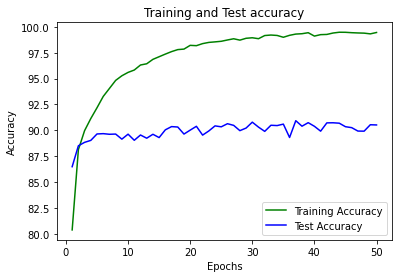

In [13]:
#Plotting the accuracy graph of training and test data on rely activation network
epochs = range(1,51)
plt.plot(epochs, relu_training_accuracy_per_epoch, 'g', label='Training Accuracy')
plt.plot(epochs, relu_test_accuracy_per_epoch, 'b', label='Test Accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

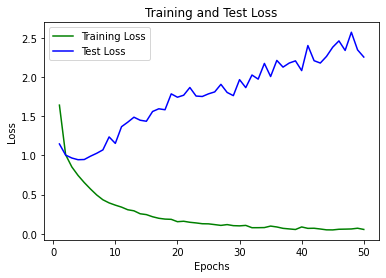

In [14]:
#Plotting the loss graph of training and test data
epochs = range(1,51)
plt.plot(epochs, relu_training_loss_per_epoch, 'g', label='Training Loss')
plt.plot(epochs, relu_test_loss_per_epoch, 'b', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# C Question

### Tanh Activation Function Network

In [15]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with Tanh activation function
class Network_tanh(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight)
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight)

        #Fully Connected Layer Initialization
        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight)
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight)
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight)

    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = torch.tanh(t)   #tanh activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = torch.tanh(t)   #tanh activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = torch.tanh(t)   #tanh activation

        # 2nd Linear Layer
        t = self.fc2(t)
        t = torch.tanh(t)   #tanh activation

        # Output Layer
        t = self.out(t)    

        return t

In [16]:
# Creating an instance of our tanh network class
network_tanh = Network_tanh().to(device) #Passing the network model to the GPU

In [17]:
#Creating arrays which will store the accuracy and loss for training and test data for Tanh

tanh_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
tanh_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
tanh_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
tanh_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [18]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the tanh network

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_tanh, learning_rate =0.1)
    tanh_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    tanh_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_tanh)
    tanh_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    tanh_test_loss_per_epoch.append(test_loss_per_epoch)

In [19]:
#Final train and test accuracy obtained on tanh activation network
print("Final Tanh Training Accuracy Obtained : {}".format(tanh_training_accuracy_per_epoch[-1]))
print("Final Tanh Test Accuracy Obtained : {}".format(tanh_test_accuracy_per_epoch[-1]))

Final Tanh Training Accuracy Obtained : 100.0
Final Tanh Test Accuracy Obtained : 91.35


### Sigmoid  Activation Function Network

In [20]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with Sigmoid activation function
class Network_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter 
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight)
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight)

        #Fully Connected Layer Initialization
        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight)
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight)
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight)

    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = torch.sigmoid(t)   #sigmoid activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = torch.sigmoid(t)   #sigmoid activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = torch.sigmoid(t)   #sigmoid activation

        # 2nd Linear Layer
        t = self.fc2(t)
        t = torch.sigmoid(t)   #sigmoid activation

        # Output Layer
        t = self.out(t)

        return t

In [21]:
# Creating an instance of our sigmoid network class
network_sigmoid = Network_sigmoid().to(device) #Passing the network model to the GPU

In [22]:
#Creating arrays which will store the accuracy and loss for training and test data for Sigmoid

sigmoid_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
sigmoid_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
sigmoid_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
sigmoid_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [23]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the sigmoid network

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_sigmoid, learning_rate =0.1)
    sigmoid_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    sigmoid_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_sigmoid)
    sigmoid_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    sigmoid_test_loss_per_epoch.append(test_loss_per_epoch)

In [30]:
print("Final Sigmoid Training Accuracy Obtained : {}".format(sigmoid_training_accuracy_per_epoch[-1]))
print("Final Sigmoid Test Accuracy Obtained : {}".format(sigmoid_test_accuracy_per_epoch[-1]))

Final Sigmoid Training Accuracy Obtained : 92.63333333333334
Final Sigmoid Test Accuracy Obtained : 90.51


### Elu  Activation Function Network

In [25]:
class Network_elu(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter 
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight)
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight)

        #Fully Connected Layer Initialization
        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight)
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight)
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight)

    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = F.elu(t)   #elu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = F.elu(t)   #elu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = F.elu(t)   #elu activation

        # 2nd Linear Layer
        t = self.fc2(t)
        t = F.elu(t)   #elu activation

        # Output Layer
        t = self.out(t)

        return t

In [26]:
# Creating an instance of our elu network class
network_elu = Network_elu().to(device)  #Passing the network model to the GPU

In [27]:
#Creating arrays which will store the accuracy and loss for training and test data for elu

elu_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
elu_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
elu_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
elu_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [28]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the elu network

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_elu, learning_rate =0.1)
    elu_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    elu_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_elu)
    elu_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    elu_test_loss_per_epoch.append(test_loss_per_epoch)

In [29]:
print("Final Elu Training Accuracy Obtained : {}".format(elu_training_accuracy_per_epoch[-1]))
print("Final Elu Test Accuracy Obtained : {}".format(elu_test_accuracy_per_epoch[-1]))

Final Elu Training Accuracy Obtained : 99.35
Final Elu Test Accuracy Obtained : 90.28


### Trying Learning rate = 0.001

In [31]:
#Trying different learning rate

In [32]:
#Creating arrays which will store the accuracy and loss for training and test data for relu

relu2_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu2_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu2_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu2_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [33]:
# Creating an instance of our relu network class
network_relu_2 = Network_relu().to(device)  #Passing the network model to the GPU

In [34]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network

#Training with learning rate = 0.001
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_2, learning_rate =0.001)
    relu2_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu2_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_2)
    relu2_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu2_test_loss_per_epoch.append(test_loss_per_epoch)

In [43]:
print("Training accuracy after changing learning rate to 0.001 :->{}".format(relu2_training_accuracy_per_epoch))

Training accuracy after changing learning rate to 0.001 :-> [49.285, 69.14166666666667, 72.89, 75.06833333333333, 76.81166666666667, 78.04166666666667, 79.06833333333333, 79.97, 80.68333333333334, 81.41666666666667, 81.96, 82.48, 82.91666666666667, 83.29166666666667, 83.65666666666667, 83.99666666666667, 84.29333333333334, 84.62833333333333, 84.91, 85.22333333333333, 85.47166666666666, 85.725, 85.89666666666666, 86.08666666666667, 86.28666666666666, 86.475, 86.61833333333334, 86.745, 86.90666666666667, 87.05666666666667, 87.165, 87.29333333333334, 87.41, 87.52, 87.645, 87.74, 87.83, 87.925, 88.02166666666666, 88.115, 88.21, 88.315, 88.42666666666666, 88.52666666666667, 88.60166666666667, 88.70833333333333, 88.79833333333333, 88.875, 88.98333333333333, 89.08166666666666]


In [44]:
print("Test accuracy after changing learning rate to 0.001 :->{}".format(relu2_test_accuracy_per_epoch))

Test accuracy after changing learning rate to 0.001 :->[66.21, 72.26, 74.59, 76.14, 77.49, 78.31, 79.25, 80.03, 80.74, 81.3, 81.88, 82.33, 82.69, 83.15, 83.42, 83.7, 83.96, 84.18, 84.42, 84.83, 84.81, 85.01, 85.26, 85.38, 85.53, 85.62, 85.77, 85.97, 86.12, 86.34, 86.41, 86.46, 86.55, 86.68, 86.82, 86.85, 86.99, 87.08, 87.17, 87.35, 87.37, 87.4, 87.52, 87.62, 87.71, 87.77, 87.78, 87.87, 87.89, 87.95]


### Trying Learning rate = 0.5

In [37]:
#Creating arrays which will store the accuracy and loss for training and test data for relu

relu3_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu3_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu3_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu3_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [38]:
# Creating an instance of our relu network class
network_relu_3 = Network_relu().to(device)  #Passing the network model to the GPU

In [39]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network

#Training with learning rate = 0.5
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_3, learning_rate =0.5)
    relu3_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu3_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_3)
    relu3_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu3_test_loss_per_epoch.append(test_loss_per_epoch)

In [45]:
print("Training accuracy after changing learning rate to 0.5 :->{}".format(relu3_training_accuracy_per_epoch))

Training accuracy after changing learning rate to 0.5 :->[75.49666666666667, 85.16, 86.89333333333333, 88.01, 88.0, 87.47333333333333, 88.40333333333334, 89.16666666666667, 89.80333333333333, 90.32333333333334, 89.64, 90.11166666666666, 89.34166666666667, 87.44, 89.10833333333333, 89.64166666666667, 89.62, 89.70833333333333, 89.69833333333334, 90.18333333333334, 90.17, 89.92333333333333, 90.08, 89.69, 89.44333333333333, 89.75166666666667, 89.49333333333334, 88.71666666666667, 88.59666666666666, 89.33333333333333, 87.90833333333333, 10.658333333333333, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035, 10.035]


In [46]:
print("Test accuracy after changing learning rate to 0.5 :->{}".format(relu3_test_accuracy_per_epoch))

Test accuracy after changing learning rate to 0.5 :->[83.99, 85.68, 86.47, 85.97, 84.63, 85.93, 86.2, 85.84, 86.26, 86.74, 87.09, 86.64, 83.14, 85.11, 85.3, 85.38, 85.89, 85.14, 85.74, 86.15, 85.45, 86.18, 85.32, 84.05, 85.55, 85.05, 84.88, 85.36, 85.97, 84.37, 76.92, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


### Trying Learning rate = 1

In [47]:
#Creating arrays which will store the accuracy and loss for training and test data for relu

relu4_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu4_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu4_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu4_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [48]:
# Creating an instance of our relu network class
network_relu_4 = Network_relu().to(device)  #Passing the network model to the GPU

In [49]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network

#Training with learning rate = 1
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_4, learning_rate =1)
    relu4_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu4_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_4)
    relu4_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu4_test_loss_per_epoch.append(test_loss_per_epoch)

In [50]:
print("Training accuracy after changing learning rate to 1 :->{}".format(relu4_training_accuracy_per_epoch))

Training accuracy after changing learning rate to 1 :->[10.085, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.058333333333334, 10.0583333333333

In [51]:
print("Test accuracy after changing learning rate to 1 :->{}".format(relu4_test_accuracy_per_epoch))

Test accuracy after changing learning rate to 1 :->[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


### Trying Learning rate = 10

In [52]:
#Creating arrays which will store the accuracy and loss for training and test data for relu

relu5_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu5_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu5_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu5_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [53]:
# Creating an instance of our relu network class
network_relu_5 = Network_relu().to(device)  #Passing the network model to the GPU

In [54]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network

#Training with learning rate = 10
epochs = 50
for i in range(1,epochs+1):
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_5, learning_rate =10)
    relu5_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu5_training_loss_per_epoch.append(train_loss_per_epoch)
    
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_5)
    relu5_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu5_test_loss_per_epoch.append(test_loss_per_epoch)

In [55]:
print("Training accuracy after changing learning rate to 10 :->{}".format(relu5_training_accuracy_per_epoch))

Training accuracy after changing learning rate to 10 :->[10.001666666666667, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


In [56]:
print("Test accuracy after changing learning rate to 10 :->{}".format(relu5_test_accuracy_per_epoch))

Test accuracy after changing learning rate to 10 :->[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


# D question

### Adding droput of 0.3 to the 2nd fully connected layer

In [57]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with ReLU activation function with network having dropout
class Network_relu_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight) #Initializing the weights to the 1st convolutional layer
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight) #Initializing the weights to the 2nd convolutional layer

        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight) #Initializing the weights to the 1st linear layer
        self.dropout = nn.Dropout(p = 0.3)  #Initializing dropout of 0.3
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight) #Initializing the weights to the 2nd linear layer
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight) #Initializing the weights to the output layer

    
    #Mapping input tensor to the outpur tensor
    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = F.relu(t)   #relu activation
       # t = self.dropout(t) 

        # 2nd Linear Layer
        t = self.fc2(t)
        t = self.dropout(t) #Adding dropout
        t = F.relu(t)   #relu activation

        # Output Layer
        t = self.out(t)

        return t

In [58]:
# Creating an instance of our network class
network_relu_dropout = Network_relu_dropout().to(device) #Passing the network model to the GPU

In [59]:
#Creating arrays which will store the accuracy and loss for training and test data for relu with dropout

relu_dropout_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu_dropout_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu_dropout_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu_dropout_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [60]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network with dropout

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    #Training on training loader
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_dropout, learning_rate =0.1)
    #Storing accuracy and loss after every epoch on training data
    relu_dropout_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu_dropout_training_loss_per_epoch.append(train_loss_per_epoch)
    
    #Testing on test loader
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_dropout)
    #Storing accuracy and loss after every epoch on test data
    relu_dropout_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu_dropout_test_loss_per_epoch.append(test_loss_per_epoch)

In [61]:
#Final train and test accuracy obtained after dropout = 0.3
print("Final Training Accuracy Obtained on adding dropout: {}".format(relu_dropout_training_accuracy_per_epoch[-1]))
print("Final Test Accuracy Obtained on adding dropout: {}".format(relu_dropout_test_accuracy_per_epoch[-1]))

Final Training Accuracy Obtained on adding dropout: 98.76666666666667
Final Test Accuracy Obtained on adding dropout: 90.0


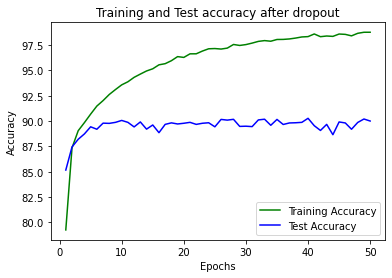

In [62]:
#Plotting the accuracy graph of training and test data after adding dropout
epochs = range(1,51)
plt.plot(epochs, relu_dropout_training_accuracy_per_epoch, 'g', label='Training Accuracy')
plt.plot(epochs, relu_dropout_test_accuracy_per_epoch, 'b', label='Test Accuracy')
plt.title('Training and Test accuracy after dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Increasing droput on 0.5 to the 2nd fully connected layer

In [63]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with ReLU activation function with network having dropout
class Network_relu_dropout2(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight) #Initializing the weights to the 1st convolutional layer
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight) #Initializing the weights to the 2nd convolutional layer

        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight) #Initializing the weights to the 1st linear layer
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight) #Initializing the weights to the 2nd linear layer
        self.dropout = nn.Dropout(p = 0.5) #Initializing dropout of 0.5
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight) #Initializing the weights to the output layer

    
    #Mapping input tensor to the outpur tensor
    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = F.relu(t)   #relu activation
        #t = self.dropout(t) 

        # 2nd Linear Layer
        t = self.fc2(t)
        t = self.dropout(t) #Adding dropout
        t = F.relu(t)   #relu activation        

        # Output Layer
        t = self.out(t)

        return t

In [64]:
# Creating an instance of our network class
network_relu_dropout2 = Network_relu_dropout2().to(device) #Passing the network model to the GPU

In [65]:
#Creating arrays which will store the accuracy and loss for training and test data for relu with dropout

relu_dropout2_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu_dropout2_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu_dropout2_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu_dropout2_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [66]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network with dropout

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    #Training on training loader
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_dropout2, learning_rate =0.1)
    #Storing accuracy and loss after every epoch on training data
    relu_dropout2_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu_dropout2_training_loss_per_epoch.append(train_loss_per_epoch)
    
    #Testing on test loader
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_dropout2)
    #Storing accuracy and loss after every epoch on test data
    relu_dropout2_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu_dropout2_test_loss_per_epoch.append(test_loss_per_epoch)

In [67]:
#Final train and test accuracy obtained after dropout = 0.5
print("Final Training Accuracy Obtained after increasing dropout: {}".format(relu_dropout2_training_accuracy_per_epoch[-1]))
print("Final Test Accuracy Obtained after increasing dropout: {}".format(relu_dropout2_test_accuracy_per_epoch[-1]))

Final Training Accuracy Obtained after increasing dropout: 98.18666666666667
Final Test Accuracy Obtained after increasing dropout: 90.6


### Decreasing droput to 0.2 on the 2nd fully connected layer

In [68]:
#Creating a neural network class which extends the nn.Module base class

#Created a network with ReLU activation function with network having dropout
class Network_relu_dropout3(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the neural network layers as class attributes
        #Our Network has five layers comprising of two convolutional layers, 2 linear layers and 1 output layer.
        
        # in_channels = No of colour channels of the input image
        # out_channels = No of output channels 
        # kernel_size = Height and width of the filter
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv1.weight) #Initializing the weights to the 1st convolutional layer
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
        nn.init.xavier_uniform_(self.conv2.weight) #Initializing the weights to the 2nd convolutional layer

        # in_features = length of the flattened output from the previous layer
        # out_features = Size of the output tensor
        self.fc1 = nn.Linear(in_features = 64*4*4, out_features = 1024)
        nn.init.xavier_uniform_(self.fc1.weight) #Initializing the weights to the 1st linear layer
        self.dropout = nn.Dropout(p = 0.2) #Initializing dropout of 0.2
        
        self.fc2 = nn.Linear(in_features = 1024, out_features = 256)
        nn.init.xavier_uniform_(self.fc2.weight) #Initializing the weights to the 2nd linear layer
        
        self.out = nn.Linear(in_features = 256, out_features = 10)
        nn.init.xavier_uniform_(self.out.weight) #Initializing the weights to the output layer

    
    #Mapping input tensor to the outpur tensor
    def forward(self, t):

        # 1st Convolutional Layer
        t = self.conv1(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 2nd Convolutional Layer
        t = self.conv2(t)
        t = F.relu(t)   #relu activation
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)  #Max pooling

        # 1st Linear Layer
        t = t.reshape(-1, 64*4*4)
        t = self.fc1(t)
        t = F.relu(t)   #relu activation
        t = self.dropout(t) #Adding dropout

        # 2nd Linear Layer
        t = self.fc2(t)
        t = F.relu(t)   #relu activation
#         t = self.dropout(t)

        # Output Layer
        t = self.out(t)

        return t

In [69]:
# Creating an instance of our network class
network_relu_dropout3 = Network_relu_dropout3().to(device) #Passing the network model to the GPU

In [70]:
#Creating arrays which will store the accuracy and loss for training and test data for relu with dropout

relu_dropout3_training_accuracy_per_epoch = [] #Accuracy on the training dataset after each epoch
relu_dropout3_training_loss_per_epoch = [] #Loss on the training dataset after each epoch
relu_dropout3_test_accuracy_per_epoch = [] #Accuracy on the test dataset after each epoch
relu_dropout3_test_loss_per_epoch = [] #Loss on the Test dataset after each epoch

In [71]:
#Training the netwrok and testing it's efficiency on test data after several epochs for the relu network with dropout

#Training with learning rate = 0.1
epochs = 50
for i in range(1,epochs+1):
    #Training on training loader
    training_accuracy_per_epoch, train_loss_per_epoch= train_set_accuracy(training_loader, network_relu_dropout2, learning_rate =0.1)
    #Storing accuracy and loss after every epoch on training data
    relu_dropout3_training_accuracy_per_epoch.append(training_accuracy_per_epoch)
    relu_dropout3_training_loss_per_epoch.append(train_loss_per_epoch)
    
    #Testing on test loader
    test_accuracy_per_epoch, test_loss_per_epoch= test_set_accuracy(test_loader, network_relu_dropout2)
    #Storing accuracy and loss after every epoch on test data
    relu_dropout3_test_accuracy_per_epoch.append(test_accuracy_per_epoch)
    relu_dropout3_test_loss_per_epoch.append(test_loss_per_epoch)

In [72]:
#Final train and test accuracy obtained after dropout = 0.2
print("Final Training Accuracy Obtained after decreasing dropout: {}".format(relu_dropout3_training_accuracy_per_epoch[-1]))
print("Final Test Accuracy Obtained after decreasing dropout: {}".format(relu_dropout3_test_accuracy_per_epoch[-1]))

Final Training Accuracy Obtained after decreasing dropout: 99.175
Final Test Accuracy Obtained after decreasing dropout: 90.85
